<a href="https://colab.research.google.com/github/kwanhong66/TodayILearned/blob/master/python_ml_complete_guide/3%EC%9E%A5/3_5_ROC_%EA%B3%A1%EC%84%A0%EA%B3%BC_AUC(ROC_Curve_and_AUC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Book] 파이썬 머신러닝 완벽 가이드
- 예제 코드 transcription
- 개념, 프로세스, API, Best Practice 등 익히기
- 책 예제 코드 github (https://github.com/wikibook/pymldg-rev)

## Dataset with Kaggle API

In [0]:
!pip3 install -q kaggle

In [2]:
!wget 'https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json'

--2020-03-24 14:36:32--  https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2020-03-24 14:36:32 (14.4 MB/s) - ‘kaggle.json’ saved [63/63]



In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions list

ref                                               deadline             category             reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started   Knowledge       2196           False  
titanic                                           2030-01-01 00:00:00  Getting Started   Knowledge      16639            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started   Knowledge       4530            True  
connectx                                          2030-01-01 00:00:00  Getting Started   Knowledge        323           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started       Kudos       3436           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground            Kudos      

In [6]:
!kaggle competitions download 'titanic'

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 13.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.50MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 46.6MB/s]


In [0]:
!mkdir input

In [0]:
!cp /content/train.csv /content/test.csv /content/gender_submission.csv /content/input

## 3.5 ROC 곡선과 AUC (ROC Curve and AUC)

- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선
- TPR은 recall을 의미; sensitivity(민감도)
  - TP / (FN + TP)
  - Positive(양성)이 정확하게 예측되는 수준
  - 실제 양성 데이터 중, 모델이 양성으로 예측한 정도
- Specificty에 대응하는 지표로 TNR(True Negative Rate)
  - Specificity(특이성)
  - TN / (FP + TN)
  - Negative(음성)이 정확하게 예측되는 수준
  - 1 - TNR = FPR / 1 - Specificity

- Scikit-learn의 roc_curve() API
- FPR, TPR, threshold 값 반환

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./input/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=.20, random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열 row가 55건
# 샘플로 10건만 추출하고, 임계값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값 별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임계값 별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임계값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값 별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값 별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


- FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

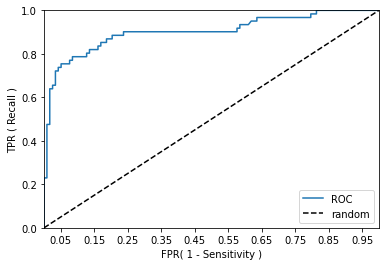

In [22]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임계값에 따른 FPR, TPR 값을 반환 받음
  fprs, tprs, threholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림
  plt.plot([0, 1], [0, 1], 'k--', label='random')

  # FPR X 축의 Scale을 0.1 단위로 변경
  # X, Y축 이름 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.xlabel('FPR( 1 - Sensitivity )')
  plt.ylabel('TPR ( Recall )')
  plt.legend()

roc_curve_plot(y_test, pred_proba_class1)

In [25]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
        F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
